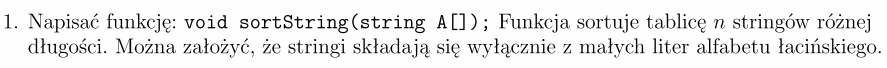

### Omówienie algorytmu

Do sortowania ciągów tekstowych najlepiej się nada się algorytm sortowania Radix Sort. Ponieważ wiemy, że stringi są różnych długości, a sortowanie leksykograficzne przebiega od ostatniej do pierwszej litery (od najmniej do najbardziej znaczącej), początkowo będziemy sortować tylko najdłuższe ciągi tekstowe, dopiero później krótsze wraz z dłuższymi, a na koniec wszystkie razem po pierwszej literze. W tym celu, na początku posortuję ciągi tekstowe według ich długości (od najmniejszej do największej) i będę przeprowadzał sortowanie Radix Sortem według kolejnych od końca liter dla coraz większych fragmentów tablicy stringów, uwzględniając sukcesywnie coraz krótsze ciągi tekstowe.

### Złożoność sortowania

$ O(k \cdot n) $, gdzie $ k $ - liczba liter w najdłuższym ciągu tekstowym, $ n $ - liczba ciągów tekstowych. Szybciej się za bardzo nie da, bo jakbyśmy chcieli użyć Quick Sorta, musimy porównywać w jakiś sposób oba ciągi tekstowe, a użycie operatora $ \gt $, $ \lt $, $ \ge $ lub $ \le $, skutkuje porównywaniem obu ciągów znak po znaku, co nie jest zbyt wydajne, bo musimy to zrobić przy każdym porównaniu. Również przekształcenie stringów na liczby nic nie da, bo samo przekształcanie ma również złożoność $ O(k \cdot n) $. Samo sortowanie liczb miałoby już złożoność $ O(n \cdot log(n)) $, ponieważ byśmy mysieli wykorzystać już np. Quick Sorta, bo nie dało by się za bardzo ich przesortować liniowo. Nawet przy założeniu, że mamy wyłącznie małe litery alfabetu łacińskiego, otrzymalibyśmy liczby w systemie o podstawie $ 26 $, a więc ciąg tekstowy o długości $ k $ zostałby przekształcony na liczbę rzędu $ 26^k $, a to nie są małe liczby.

### Implementacja algorytmu

In [1]:
def sortString(A):
    # Do not sort if there is nothing to sort
    if len(A) < 2: return
    # Sort strings by lengths (to improve the efficiency of
    # sorting strings by characters)
    _counting_sort_by_length(A)
    # Allocate a temporary array once before sorting. We will be
    # using always the same array and perform sorting on a wider
    # part of this array in each loop
    temp = [None] * len(A)
    # Sort in a loop starting from the least significant digit
    for col_idx in range(len(A[-1])-1, -1, -1):
        _counting_sort(A, col_idx, temp)
    
    
def _counting_sort_by_length(arr):
    max_len = longest_string_length(arr)
    # Allocate memory for required temporary arrays
    counts = [0] * (max_len + 1)
    temp = [None] * len(arr)
    # Count strings with the same lengths
    for string in arr:
        counts[len(string)] += 1
    # Modify the counts array to indicate how many strings 
    # are of a length greater than the current string's length
    for i in range(1, len(counts)):
        counts[i] += counts[i-1]
    # Rewrite values to the temp sorted array
    for i in range(len(arr)-1, -1, -1):
        counts[len(arr[i])] -= 1
        temp[counts[len(arr[i])]] = arr[i]
    # Rewrite sorted values to the initial array
    for i in range(len(temp)):
        arr[i] = temp[i]
    
    
def _counting_sort(arr, col_idx, temp):
    # Allocate memory for required temporary arrays
    counts = [0] * 26
    a_code = ord('a')
    # Count letters repetitions
    i = len(arr)-1
    while col_idx < len(arr[i]) and i >= 0:
        counts[ord(arr[i][col_idx]) - a_code] += 1
        i -= 1
    prev_to_last_idx = i
    # Modify the counts array to indicate how many letters have
    # ascii codes lower than or equal to the current one
    for i in range(1, len(counts)):
        counts[i] += counts[i-1]
    # Rewrite values to the temporary array
    for i in range(len(arr)-1, prev_to_last_idx, -1):
        letter_idx = ord(arr[i][col_idx]) - a_code
        temp[prev_to_last_idx + counts[letter_idx]] = arr[i]
        counts[letter_idx] -= 1
    # Rewrite sorted strings to the initial array
    for i in range(prev_to_last_idx + 1, len(temp)):
        arr[i] = temp[i]
        
        
def longest_string_length(arr):
    max_len = 0
    for string in arr:
        if len(string) > max_len:
            max_len = len(string)
    return max_len

###### Kilka testów

In [2]:
import random
from string import ascii_lowercase as letters
from pprint import pprint as pp

rand_w = lambda length: ''.join(random.choice(letters) for _ in range(length))

words = [rand_w(random.randint(0, 25)) for _ in range(random.randint(1, 40))]
sorted_arr = sorted(words)
print('=== BEFORE: ===')
pp(words)
print('\n\n=== AFTER: ===')
sortString(words)
pp(words)
print('\nIs correct?:', sorted_arr == words)

=== BEFORE: ===
['',
 'ippimutohzobrfpxudibz',
 'irwdjhurvwseahcyyu',
 'umnpwbggfrz',
 'uemaggzmzayssiqqhzzc',
 'qfek',
 'wmcfurfooimotkm',
 'pfn',
 'lgduokjbygjagpnxvr',
 'ilrbvpajpcdpzgkltkahzzc',
 'aonlvawnivtykoojybqg',
 'qsqyypsrya',
 'zmwwivifjsgig',
 'slhqhjigsptmpvhljdfzbqj',
 'cvok',
 'odjlvjg',
 'nvovnpmnjlymygtynzmjlp',
 'ohzkfjmvvhhxm']


=== AFTER: ===
['',
 'aonlvawnivtykoojybqg',
 'cvok',
 'ilrbvpajpcdpzgkltkahzzc',
 'ippimutohzobrfpxudibz',
 'irwdjhurvwseahcyyu',
 'lgduokjbygjagpnxvr',
 'nvovnpmnjlymygtynzmjlp',
 'odjlvjg',
 'ohzkfjmvvhhxm',
 'pfn',
 'qfek',
 'qsqyypsrya',
 'slhqhjigsptmpvhljdfzbqj',
 'uemaggzmzayssiqqhzzc',
 'umnpwbggfrz',
 'wmcfurfooimotkm',
 'zmwwivifjsgig']

Is correct?: True
